# Description
1. application_{train|test}.csv
    - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    - Static data for all applications. One row represents one loan in our data sample.
2. bureau.csv
    - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
3. bureau_balance.csv
    - Monthly balances of previous credits in Credit Bureau.
    - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.
4. POS_CASH_balance.csv
     - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
     - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.
5. credit_card_balance.csv
    - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
6. previous_application.csv
    - All previous applications for Home Credit loans of clients who have loans in our sample.
    - There is one row for each previous application related to loans in our data sample.
7. installments_payments.csv
    - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
    - There is a) one row for every payment that was made plus b) one row each for missed payment.
    - One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
8. HomeCredit_columns_description.csv
    - This file contains descriptions for the columns in the various data files.


**Note :** From this description, we can list all the available data files.
1. Train File : used for training (with target)
2. Test File : used for testing (without target)
3. Sample Submission file : an example file for submission
4. Additional File : 6 files that contains additional information about the loan in **Home Credit**</br>
In this project, I will only use train and test files

**This is the diagram that shows the relation of each data files:**
</br>

   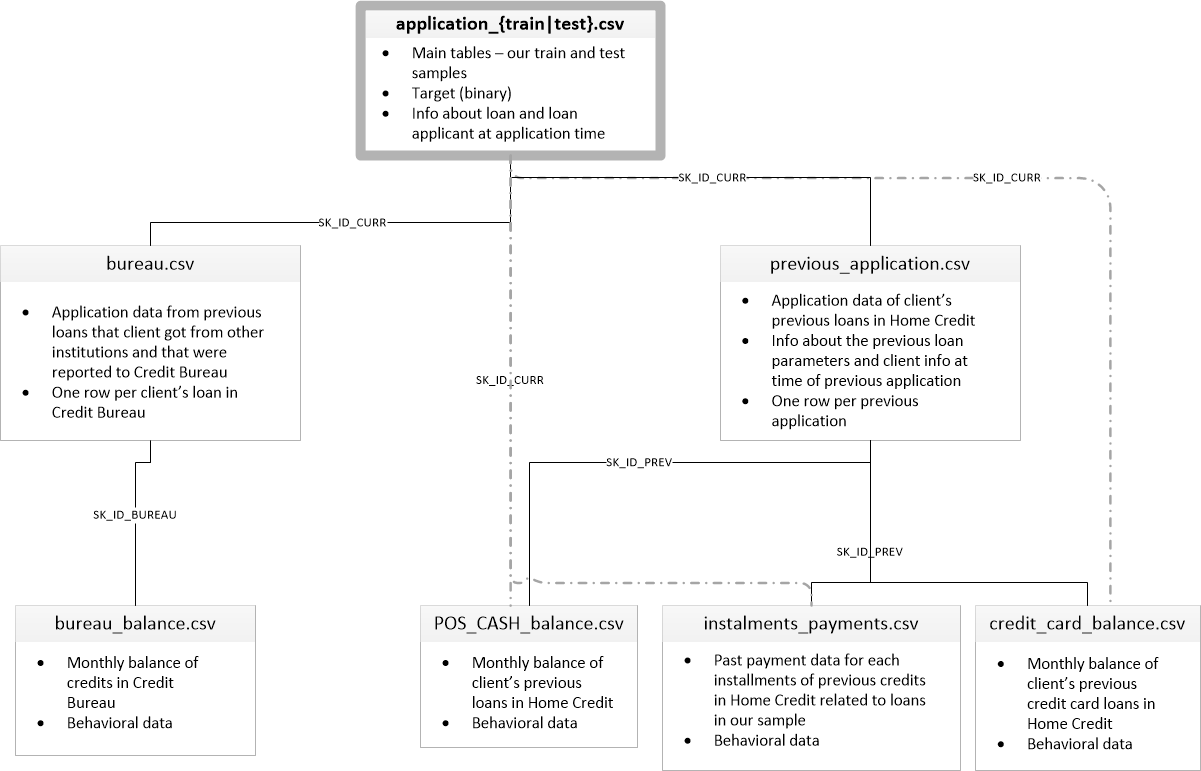

# 1. Import Step

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc

import warnings
warnings.filterwarnings ("ignore")

## 1. Read Data Files

In [2]:
app_test = pd.read_csv("application_test.csv")
app_train = pd.read_csv("application_train.csv")


ss = pd.read_csv("sample_submission.csv")
col_desc = pd.read_csv("HomeCredit_columns_description.csv", encoding = "latin1")

## 2. Checking the shape of each data files

In [3]:
def data_shapes():
    print ("Application Train shape :", app_train.shape)
    print ("Application Test shape :", app_test.shape)
    print ("Sampe Submission shape :", ss.shape)
    print ("Column Descrition shape :", col_desc.shape)

In [4]:
data_shapes()

Application Train shape : (307511, 122)
Application Test shape : (48744, 121)
Sampe Submission shape : (48744, 2)
Column Descrition shape : (219, 5)


In [5]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

# <center>**Exploratory Data Analysis (EDA)**<center>

## 1. Target Distribution

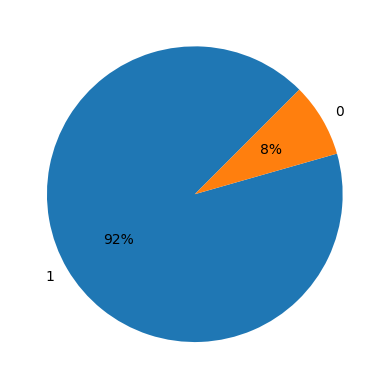

In [7]:
# Data
labels = app_train ["TARGET"].unique()
sizes = app_train["TARGET"].value_counts()

# Plotting pie chart
plt.pie(sizes, labels = labels, autopct = '%.f%%', startangle = 45)
plt.show()

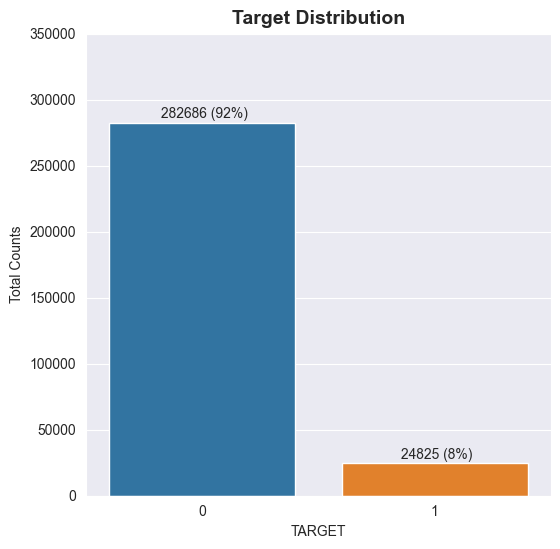

In [8]:
plt.figure (figsize = (6, 6))
sns.set_style('darkgrid')
ax = sns.countplot(x = app_train ["TARGET"],
                   order = app_train ["TARGET"].value_counts(ascending = False).index)
        
count = app_train ["TARGET"].value_counts (ascending = False)
percent = app_train ["TARGET"].value_counts (ascending = False, normalize = True).values*100
labels = [f" {p [0]} ({p [1]:.0f}%)" for p in zip (count, percent)]

ax.bar_label(container = ax.containers[0], labels = labels, padding = 1)
ax.set_title ("Target Distribution", fontsize = 14, pad = 7, fontweight = "bold")
ax.set_ylabel ("Total Counts")
ax.set_yticks (range (0,400000, 50000))
plt.show()

Based on the above visualization, the application train set is **Imbalanced**. Only 8% of the Targets are not repaid.</br>
**Tartget = 0** means the loan was repaid </br>
**Target = 1** means the loan was not repaid

In [9]:
# Create a Function for Bar Plot

def bar_plot (column, horizontal_layout = True, label_rotation = False, show_labels = True):
    
    # Calculate the Total Value Counts of each column
    col = app_train [column].value_counts()
    bar_train = pd.DataFrame ({column: col.index, "Total Counts": col.values})

    # Calculate the Percentage value for target = 1 of each column
    perc_count = app_train [[column, "TARGET"]].groupby([column], as_index=False).mean()
    perc_count.sort_values (by = "TARGET", ascending = False, inplace = True)

    # Conditional Statement for horizontal_layout
    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (18, 8))
        
    # Sets the vertical space between the 2 figures when horizontal_layout is set to False
    if not horizontal_layout:
        plt.subplots_adjust(hspace = 0.9)
    
    sns.set_color_codes ("pastel")
    # Figure 1. Total Counts
    s = sns.barplot(ax = ax1, x = column, y = "Total Counts", data = bar_train)

    # Conditional Statment for label_rotation if sets to True
    if label_rotation:
        s.set_xticklabels (s.get_xticklabels(), rotation = 90)

    # Conditional Statment for show_labels
    if show_labels:
        for p in ax1.patches:
            ax1.annotate (format (p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha = "center", va = "center", xytext = (0, 6), textcoords = "offset points")

    # Figure 2. Percentage Values
    s = sns.barplot(ax = ax2, x = column, y = "TARGET", order = perc_count[column], data = perc_count)

    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation = 90)

    if show_labels:
        for p in ax2.patches:
            ax2.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = "center", va = "center", xytext = (0, 6), textcoords = "offset points")

    plt.ylabel("Percentage Counts of Target = 1", fontsize = 10, labelpad = 5)
    plt.tick_params(axis = "both", which = "major", labelsize = 10)

    
    plt.show()

## 1. Categorical

### 1) Loans Type

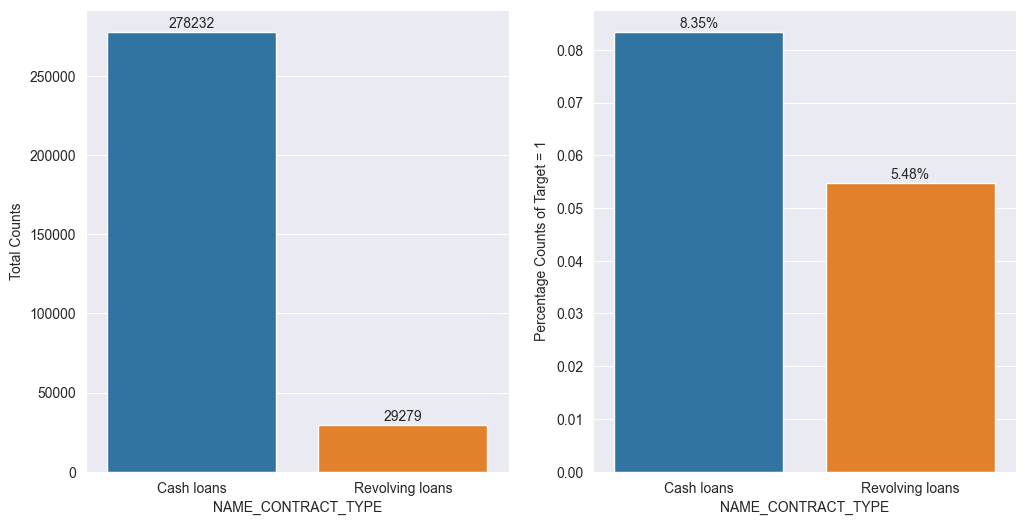

In [10]:
bar_plot ("NAME_CONTRACT_TYPE")

### 2) Customer's Gender

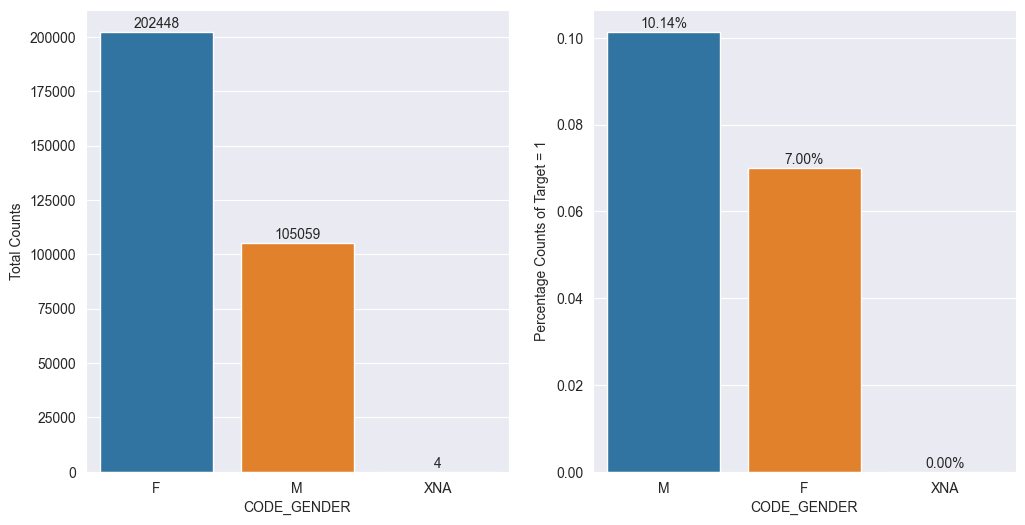

In [11]:
bar_plot ("CODE_GENDER")

In [12]:
app_train ["CODE_GENDER"] = app_train ["CODE_GENDER"].replace ("XNA", app_train ["CODE_GENDER"].mode()[0])

In [13]:
app_test ["CODE_GENDER"] = app_test ["CODE_GENDER"].replace ("XNA", app_test ["CODE_GENDER"].mode()[0])

### 3) Flag Own Car and Realty

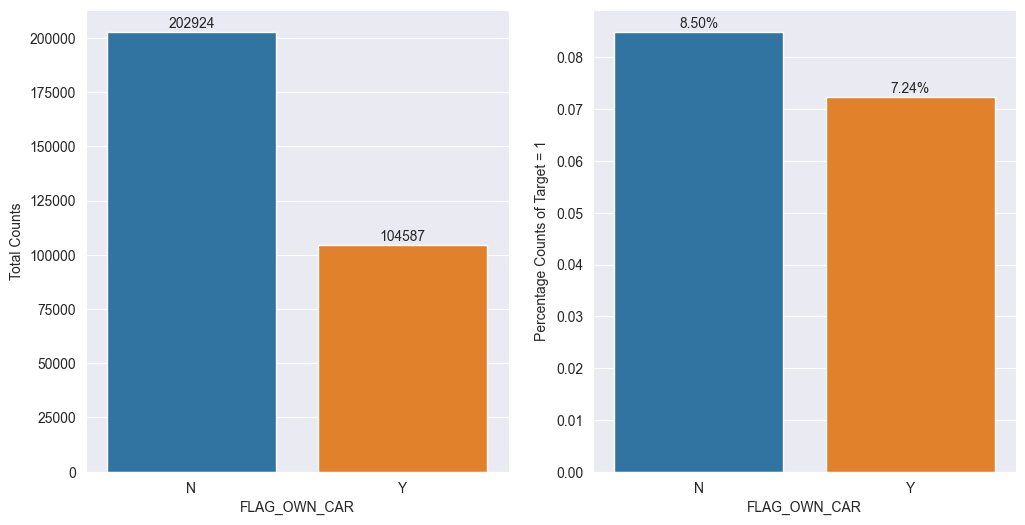

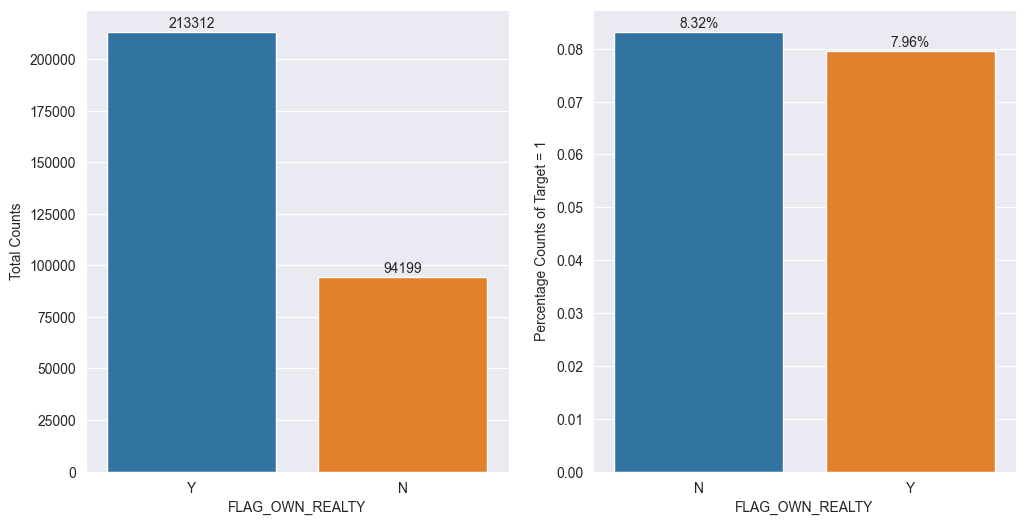

In [14]:
bar_plot ("FLAG_OWN_CAR")
bar_plot ("FLAG_OWN_REALTY")

### 4) Name Type Suit

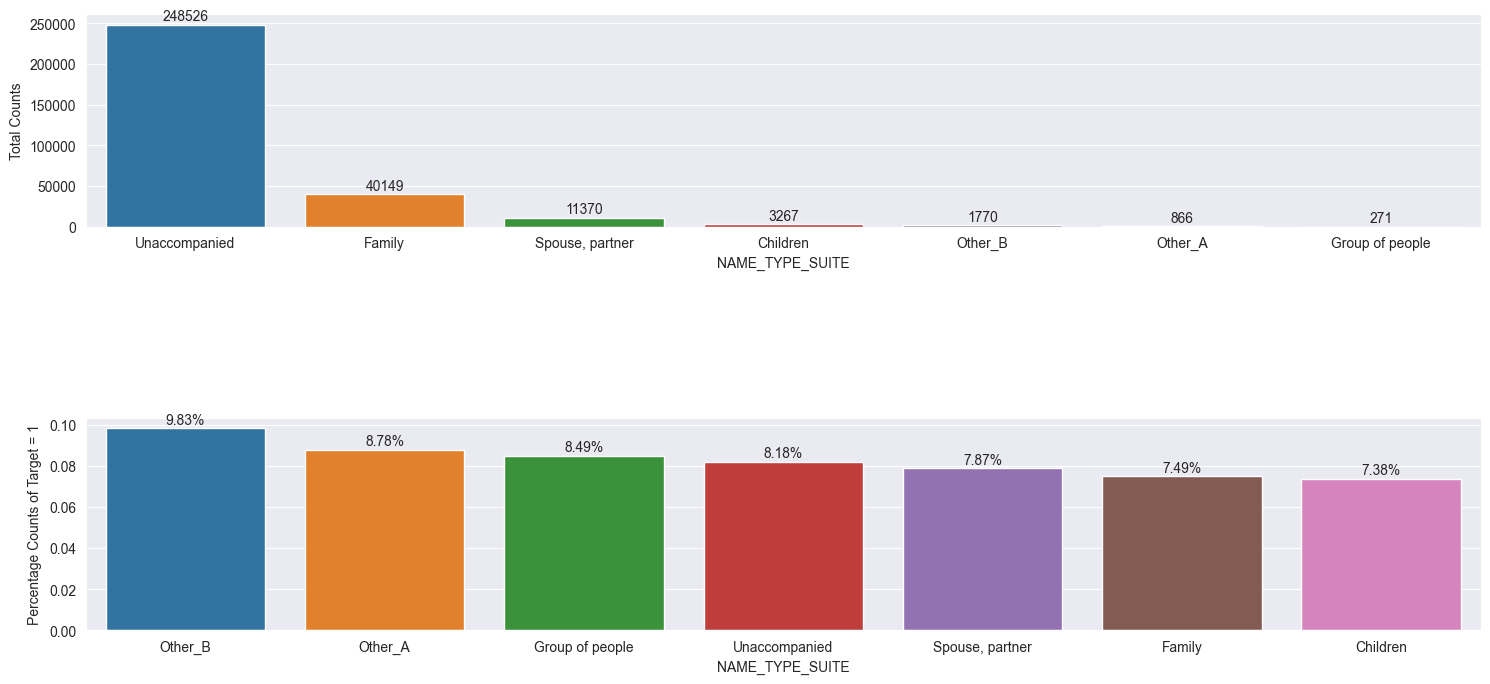

In [15]:
bar_plot ("NAME_TYPE_SUITE", False)

### 5) Income Type

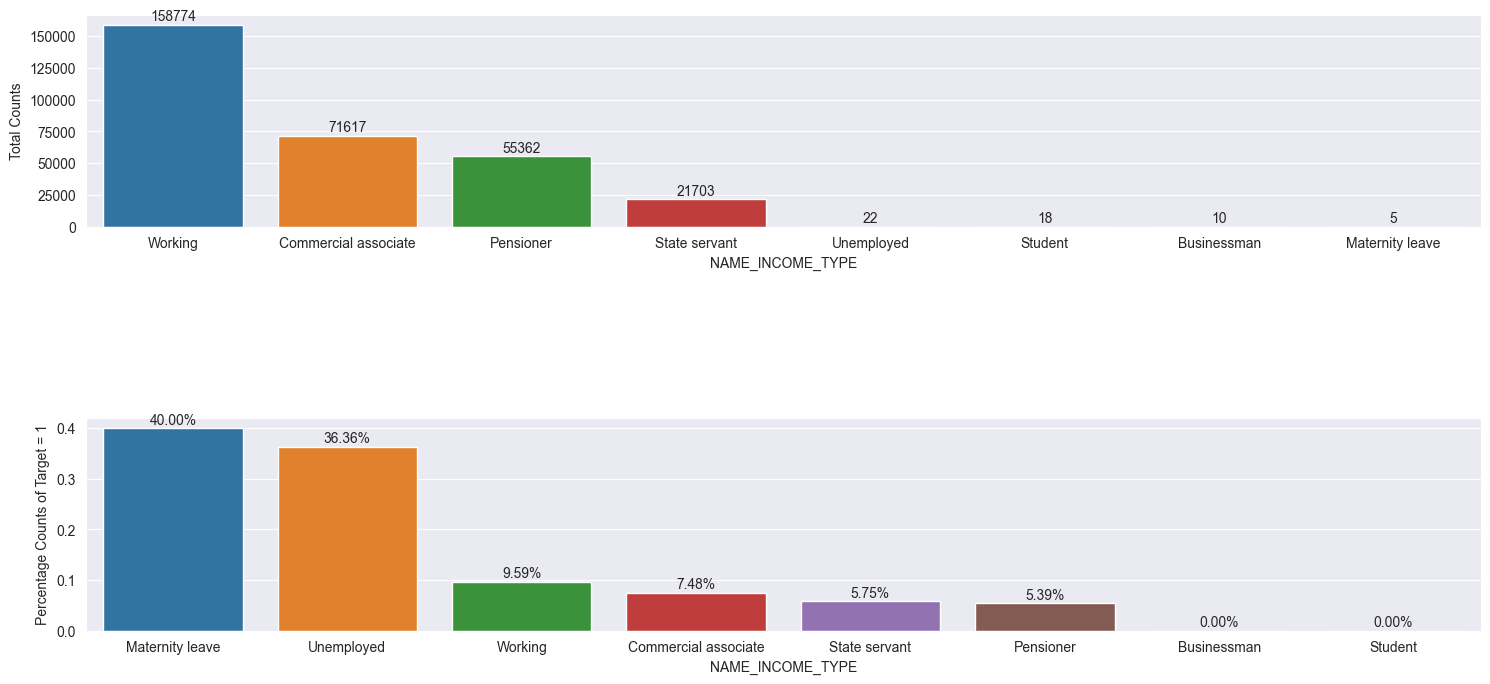

In [16]:
bar_plot ("NAME_INCOME_TYPE", False)

### 6) Education Type

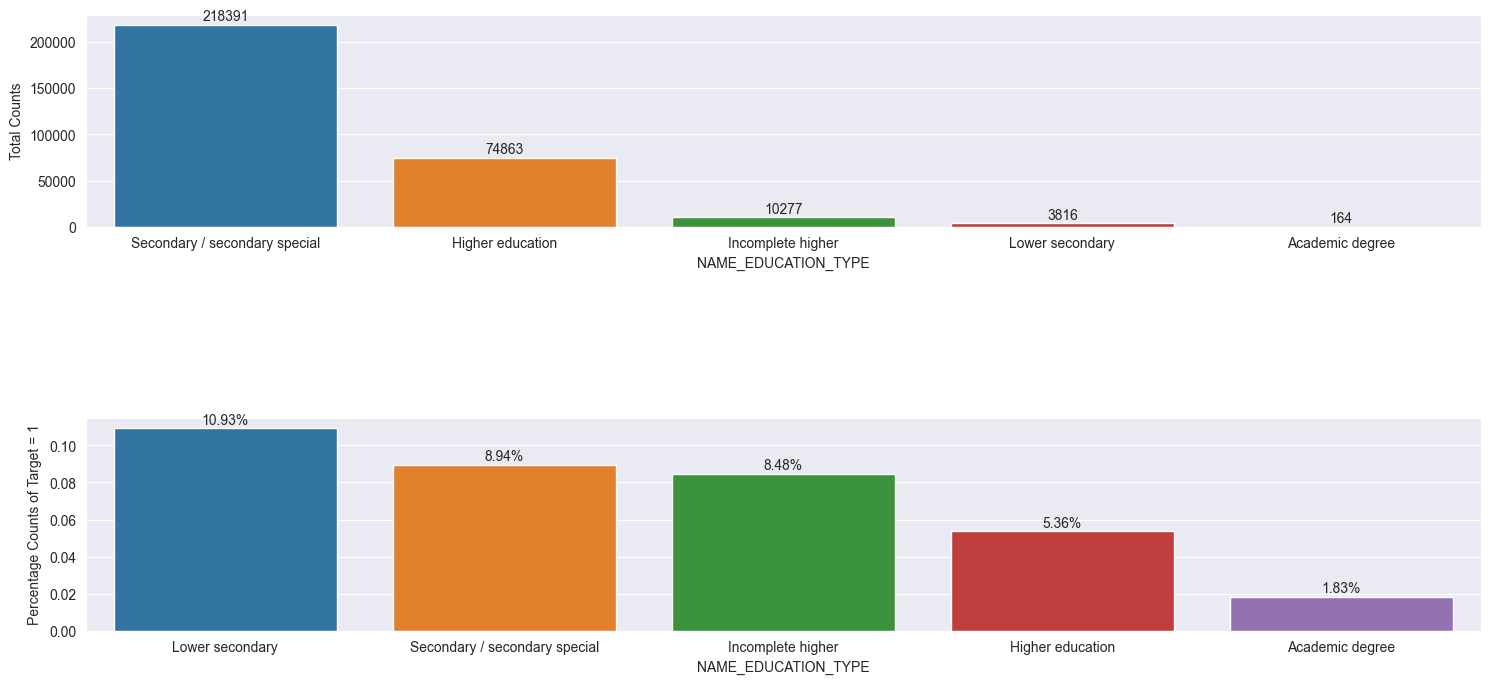

In [17]:
bar_plot ("NAME_EDUCATION_TYPE", horizontal_layout = False)

### 7) Family Status

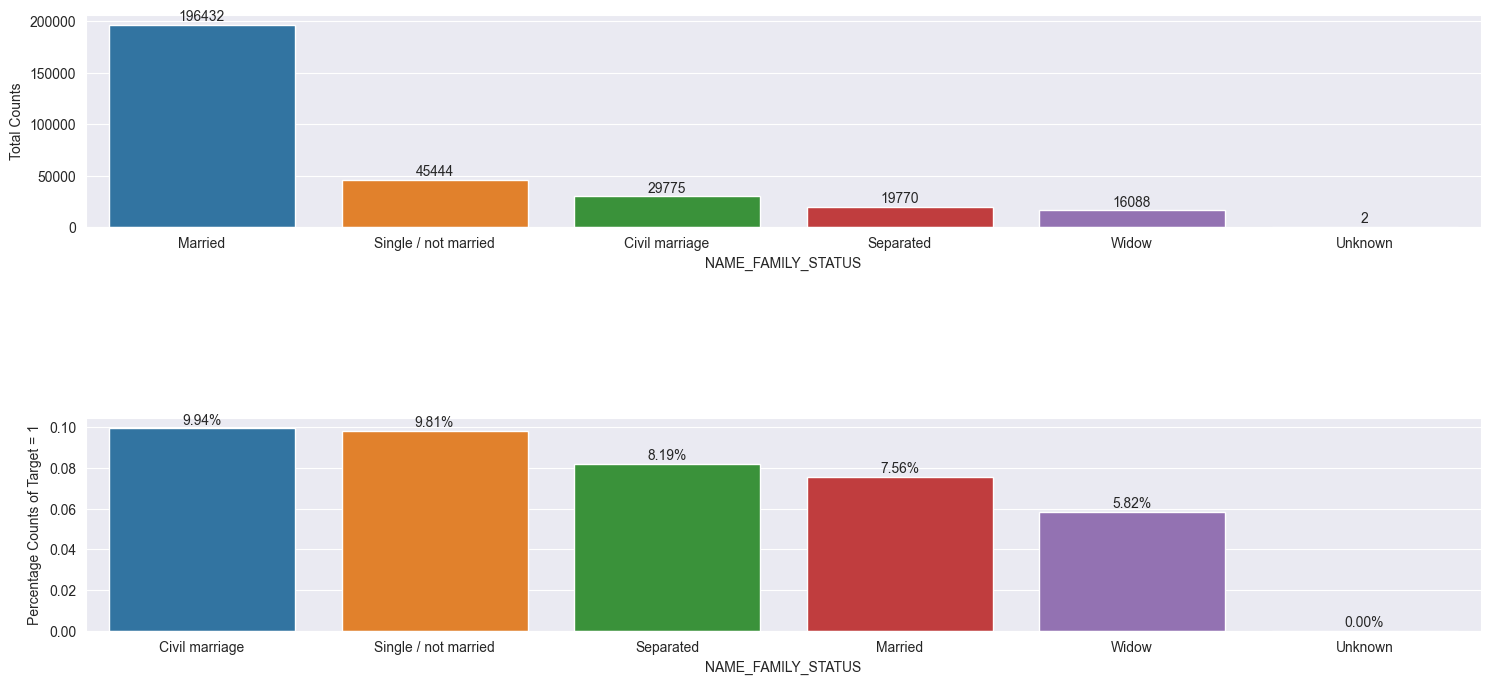

In [18]:
bar_plot ("NAME_FAMILY_STATUS", False)

In [19]:

fam_size = app_train[app_train["NAME_FAMILY_STATUS"].isin(app_train["NAME_FAMILY_STATUS"].unique())][["CNT_CHILDREN", "NAME_FAMILY_STATUS", "CNT_FAM_MEMBERS"]]
fam_size.sample(5)

,CNT_CHILDREN,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
69038,0,Separated,1.0
259612,0,Married,2.0
232846,0,Single / not married,1.0
265772,1,Married,3.0
185920,0,Married,2.0


From the information above we can see that the columns of CNT_CHILDREN, NAME_FAMILY_STATUS and CNT_FAM_MEMBERS are all related to family size as we can see in CNT_FAM_MEMBERS. Therefore we are going to drop CNT_CHILDREN.

In [20]:
app_train.drop (columns = "CNT_CHILDREN", inplace = True)
app_test.drop (columns = "CNT_CHILDREN", inplace = True)

### 8) House Type

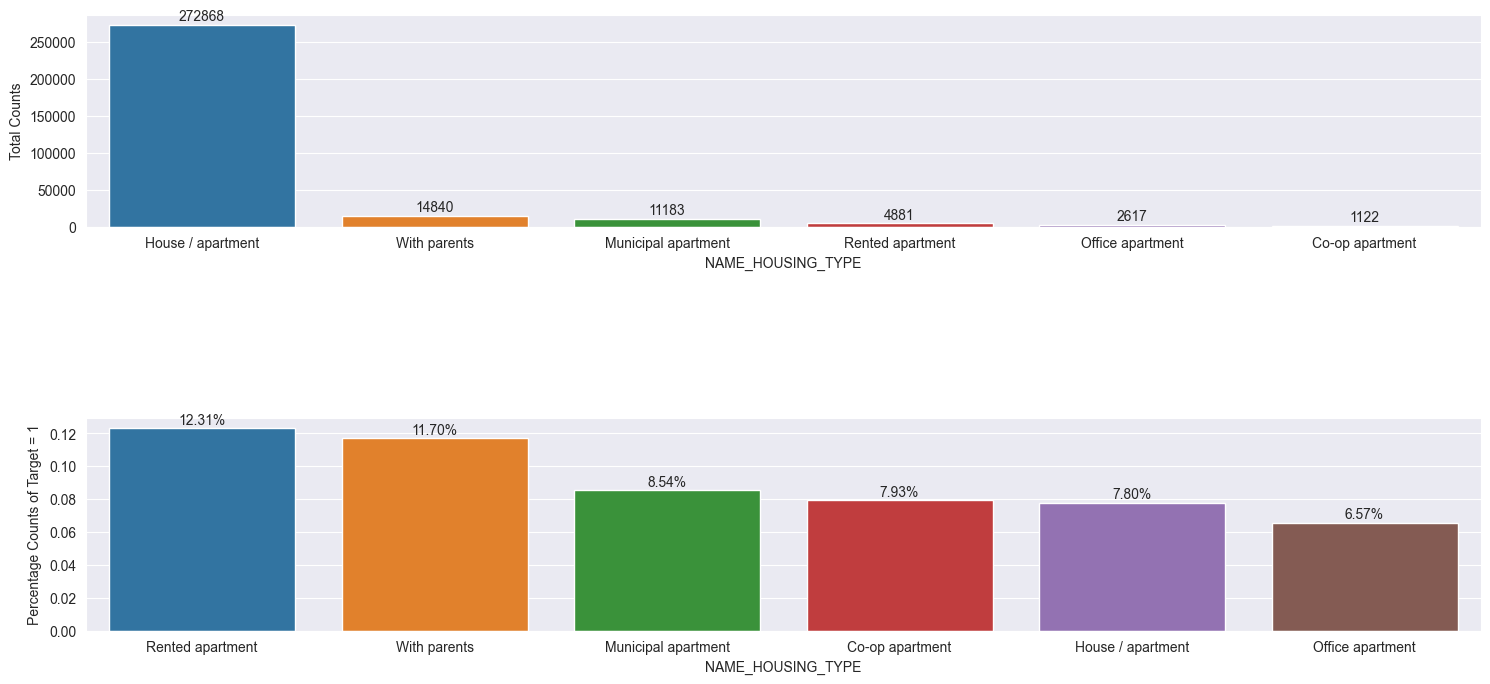

In [21]:
bar_plot ("NAME_HOUSING_TYPE", False)

### 9) Occupation Type

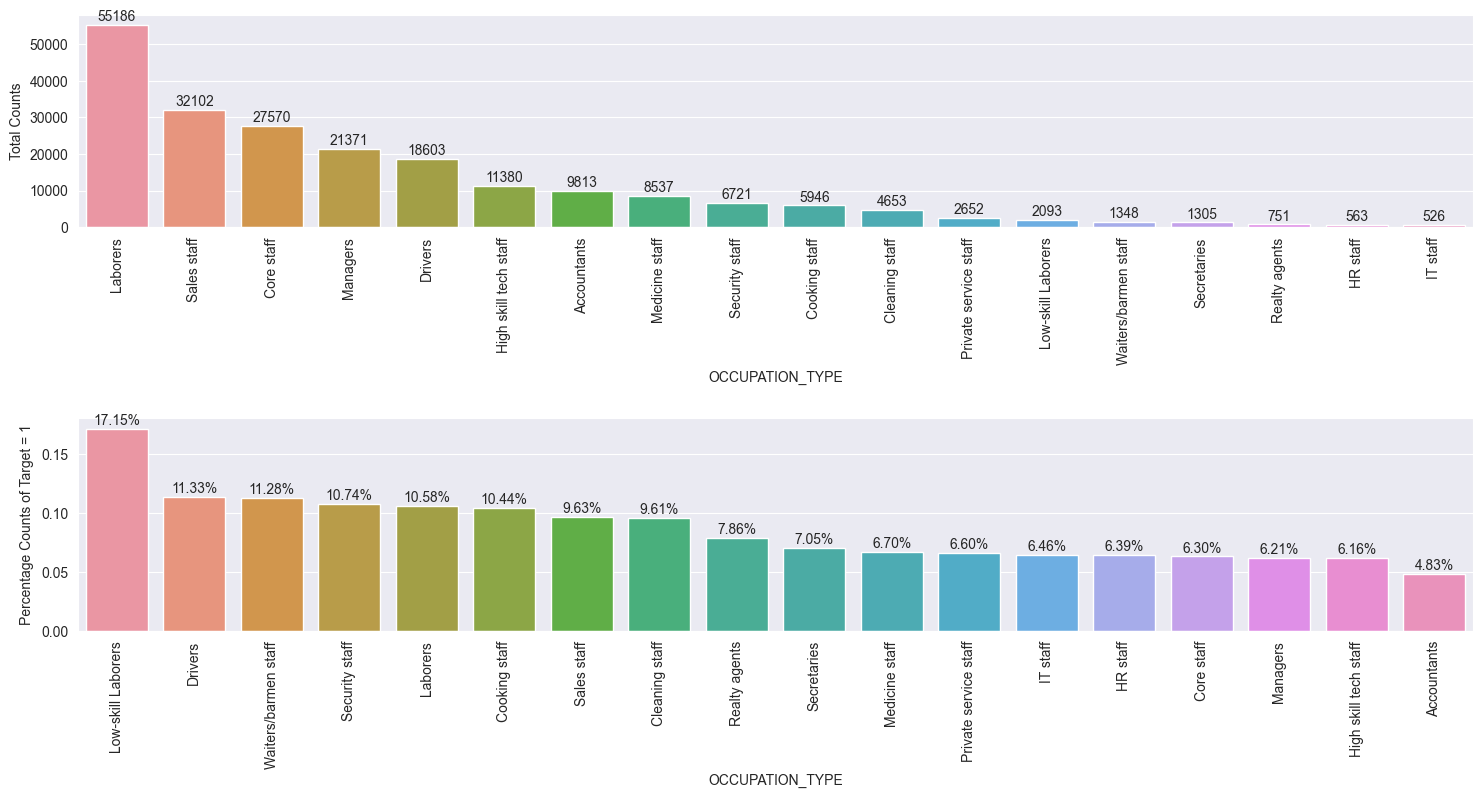

In [22]:
bar_plot ("OCCUPATION_TYPE", False, True)

### 10) Organization Type

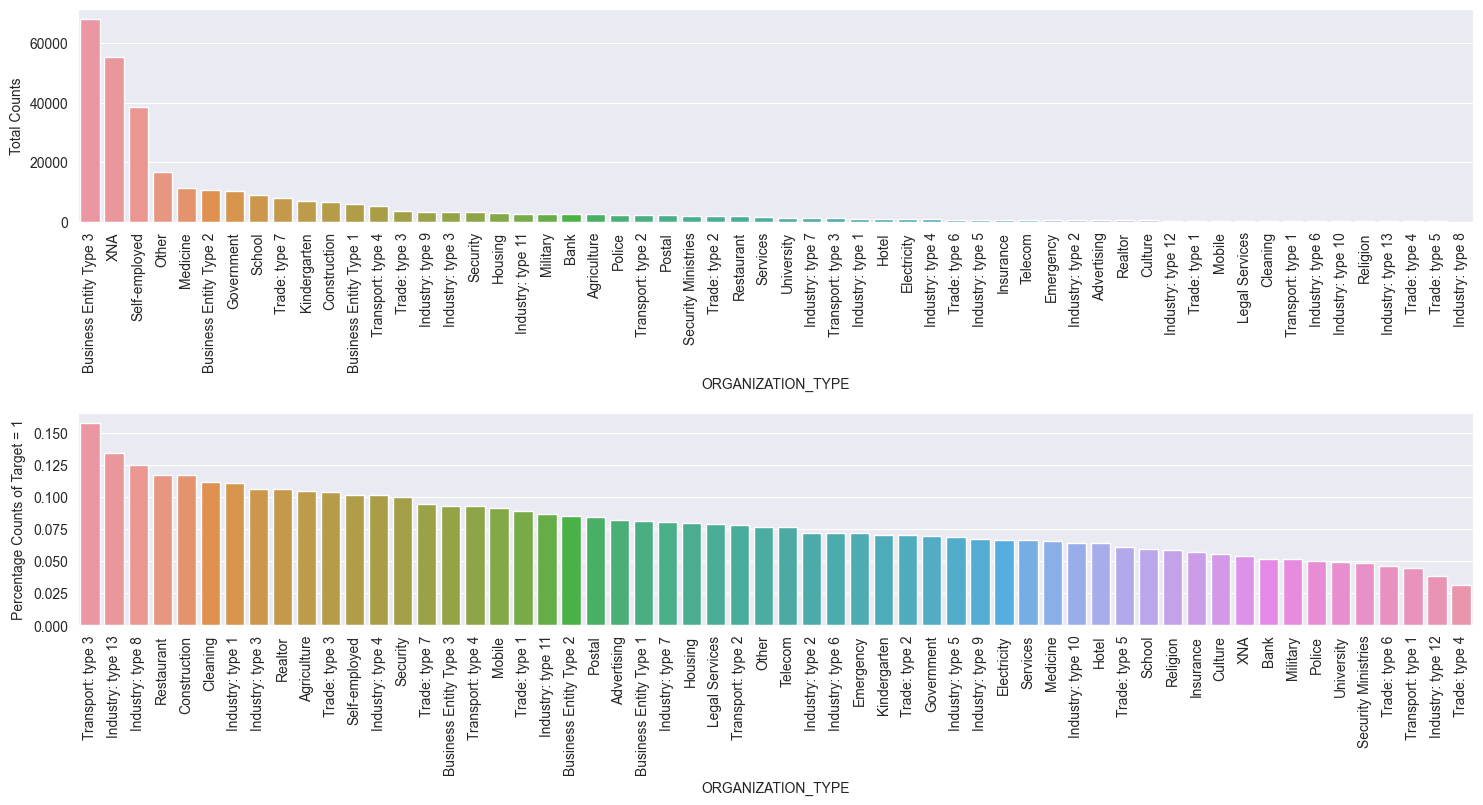

In [23]:
bar_plot ("ORGANIZATION_TYPE", False, True, False)

## 2. Numerical (Distribution)

In [24]:
def dist_plot(column, color):
    plt.figure(figsize = (7, 6))
    plt.title("Distribution of %s" % column)
    sns.distplot(app_train [column].dropna(), color = color, kde = True, bins = 100)
    plt.show()   

### 1) Total Income

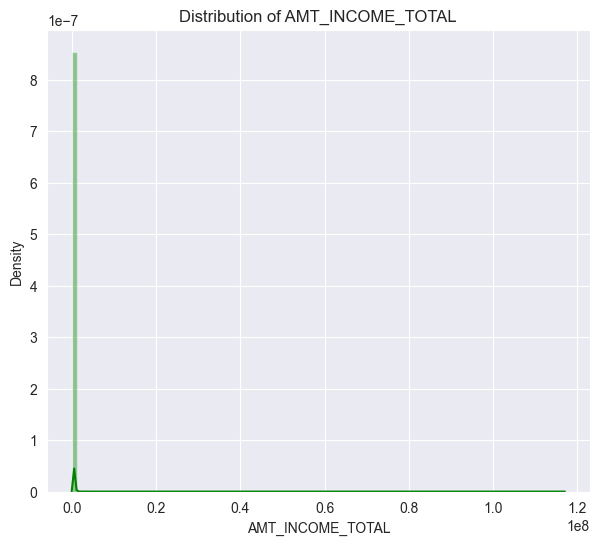

In [25]:
dist_plot ("AMT_INCOME_TOTAL", "green")

### 2) Amount Annuity

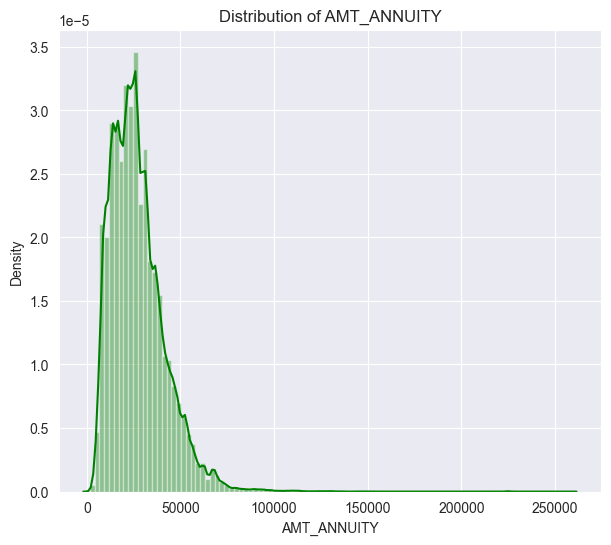

In [26]:
dist_plot ("AMT_ANNUITY", "green")

### 3) Amount Credit

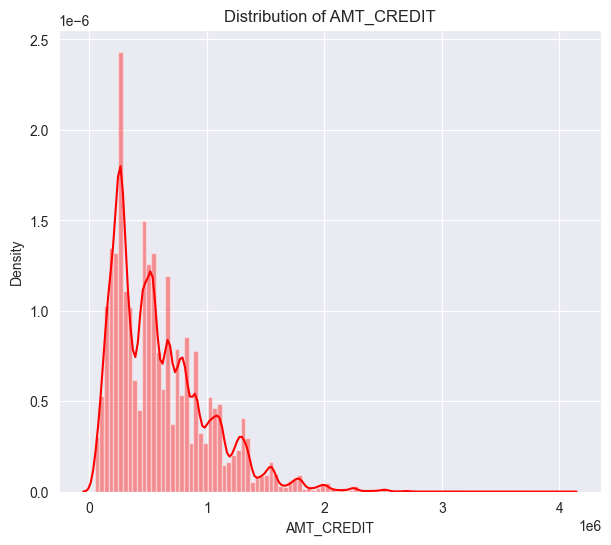

In [27]:
dist_plot ("AMT_CREDIT", "red")

### 4) Amount Goods Price

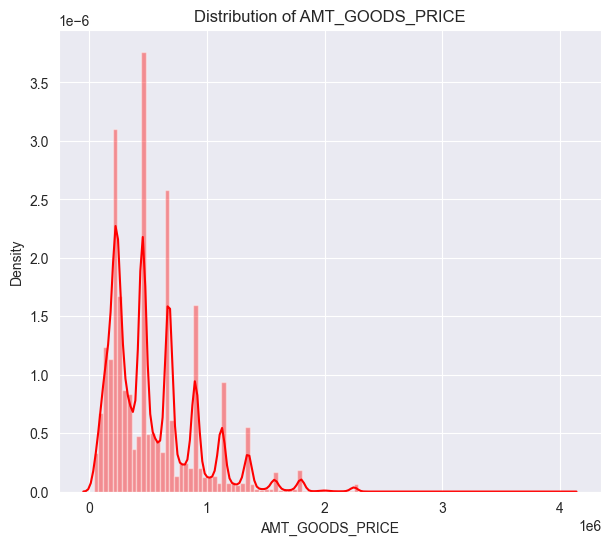

In [28]:
dist_plot ("AMT_GOODS_PRICE", "red")

### 5) Age

In [29]:
app_train ['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
age = app_train ['DAYS_BIRTH']/365

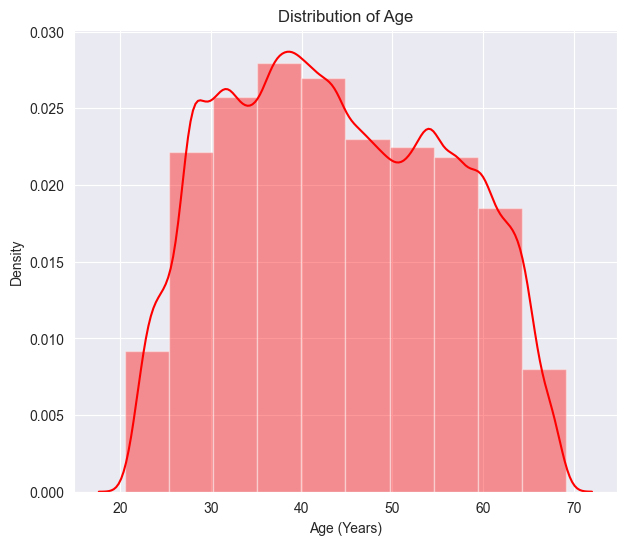

In [30]:
plt.figure(figsize = (7, 6))
plt.title("Distribution of Age")
sns.distplot(age.dropna(), color = "red", kde = True, bins = 10)
plt.xlabel("Age (Years)")
plt.show()

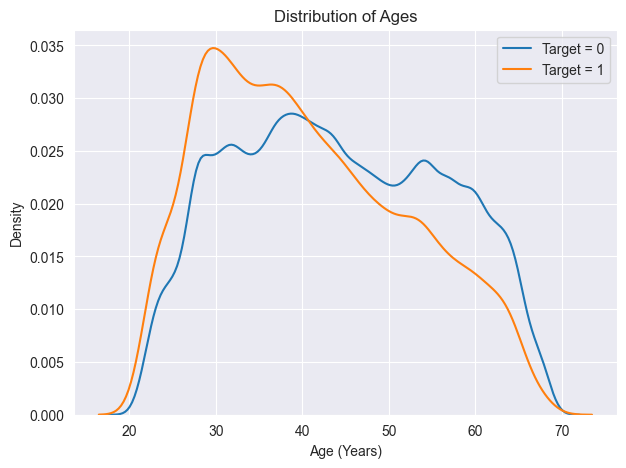

In [31]:
plt.figure(figsize = (7, 5))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'Target = 1')

plt.title('Distribution of Ages')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.legend()

plt.show()

### 6) Days of Employed

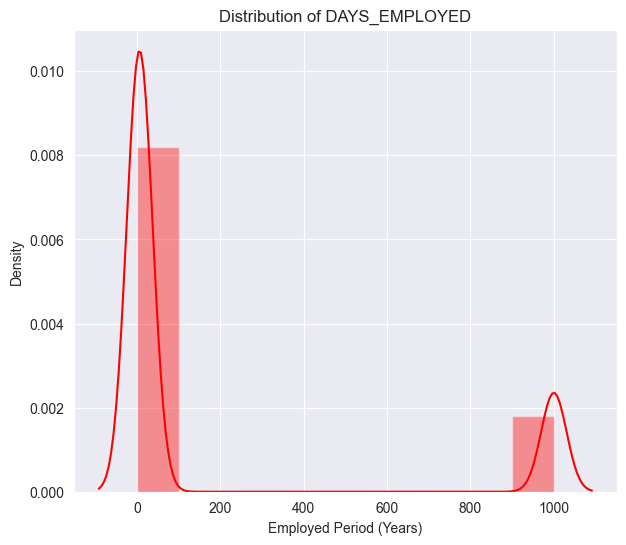

In [32]:
app_train ['DAYS_EMPLOYED'] = abs (app_train['DAYS_EMPLOYED'])
emp = app_train ['DAYS_EMPLOYED']/365

plt.figure(figsize = (7, 6))
plt.title("Distribution of DAYS_EMPLOYED")
sns.distplot(emp.dropna(), color = "red", kde = True, bins = 10)
plt.xlabel("Employed Period (Years)")
plt.show()

This totally does not look right! We get 1.000 years of employed period. Let's check it out!

In [33]:
app_train ["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [34]:
anomali = app_train [app_train ["DAYS_EMPLOYED"] == 365243]
print (len (anomali))

55374


There are 55.374 values of DAYS_EMPLOYED that is not normal. We should change it using nan/null

In [35]:
app_train ["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [36]:
app_test ['DAYS_EMPLOYED'] = abs (app_test ['DAYS_EMPLOYED'])

In [37]:
app_test ["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

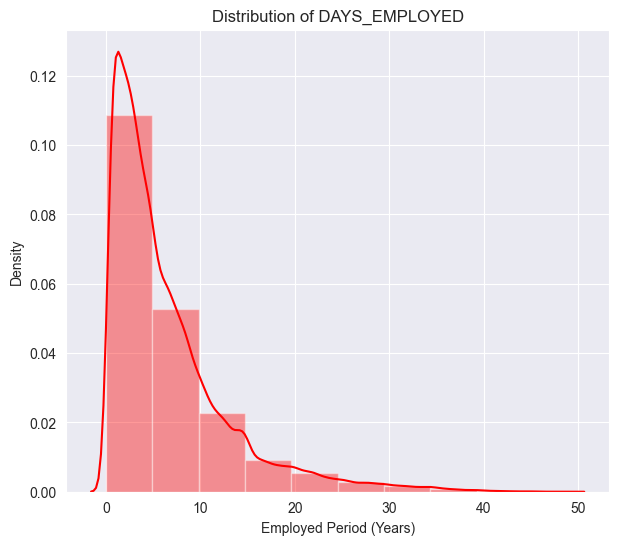

In [38]:
app_train ['DAYS_EMPLOYED'] = abs (app_train['DAYS_EMPLOYED'])
emp = app_train ['DAYS_EMPLOYED']/365

plt.figure(figsize = (7, 6))
plt.title("Distribution of DAYS_EMPLOYED")
sns.distplot(emp.dropna(), color = "red", kde = True, bins = 10)
plt.xlabel("Employed Period (Years)")
plt.show()

Now it looks more normal after we change anomli values using nan

### 7) External Source

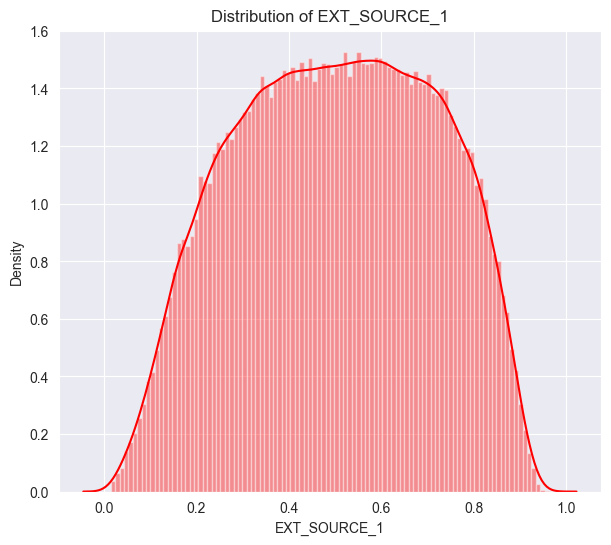

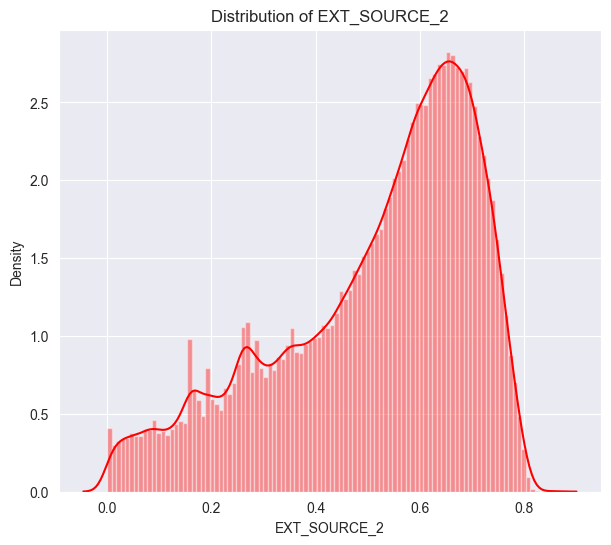

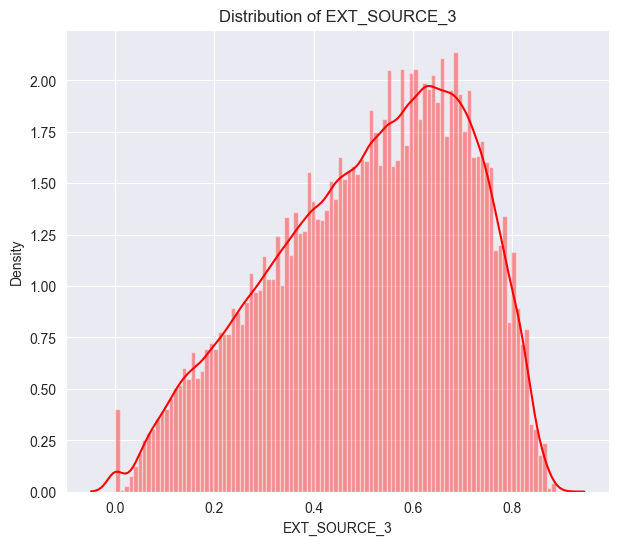

In [39]:
dist_plot ("EXT_SOURCE_1", "red")
dist_plot ("EXT_SOURCE_2", "red")
dist_plot ("EXT_SOURCE_3", "red")

- External Source 1 : Normal Distribution
- External Source 2 : Left Skewed
- External Source 3 : Close to Normal Distribution

Let's see for more detail about the difference between mean and median (50%) values using .describe() function

In [40]:
app_train [["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.000000,3.068510e+05,246546.000000
mean,0.502130,5.143927e-01,0.510853
std,0.211062,1.910602e-01,0.194844
min,0.014568,8.173617e-08,0.000527
25%,0.334007,3.924574e-01,0.370650
50%,0.505998,5.659614e-01,0.535276
75%,0.675053,6.636171e-01,0.669057
max,0.962693,8.549997e-01,0.896010


# <center>**Data Cleaning**<center>

## 1. Check Missing Value

In [41]:
missing_values = app_train.isnull().sum()
missing_percentage = missing_values/len(app_train)*100
data_type = app_train.dtypes

missing_data = pd.concat([missing_values, missing_percentage, data_type],
                         keys = ["missing_count", "missing_percentage", "data_type"],
                         axis = 1)
missing_data = missing_data [missing_data.iloc[:,1] != 0].sort_values(
        "missing_percentage", ascending=False).round(2)

print ("There are", str (missing_data.shape[0]) + " Columns of Missing Values")
missing_data.head(20)

There are 68 Columns of Missing Values


,missing_count,missing_percentage,data_type
COMMONAREA_MODE,214865,69.87,float64
COMMONAREA_AVG,214865,69.87,float64
COMMONAREA_MEDI,214865,69.87,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.43,float64
NONLIVINGAPARTMENTS_MODE,213514,69.43,float64
NONLIVINGAPARTMENTS_AVG,213514,69.43,float64
FONDKAPREMONT_MODE,210295,68.39,object
LIVINGAPARTMENTS_MEDI,210199,68.35,float64
LIVINGAPARTMENTS_AVG,210199,68.35,float64
LIVINGAPARTMENTS_MODE,210199,68.35,float64


### 1) Drop Columns with Missing Values more than 60%

In [42]:
missing_data [missing_data["missing_percentage"] > 60]

,missing_count,missing_percentage,data_type
COMMONAREA_MODE,214865,69.87,float64
COMMONAREA_AVG,214865,69.87,float64
COMMONAREA_MEDI,214865,69.87,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.43,float64
NONLIVINGAPARTMENTS_MODE,213514,69.43,float64
NONLIVINGAPARTMENTS_AVG,213514,69.43,float64
FONDKAPREMONT_MODE,210295,68.39,object
LIVINGAPARTMENTS_MEDI,210199,68.35,float64
LIVINGAPARTMENTS_AVG,210199,68.35,float64
LIVINGAPARTMENTS_MODE,210199,68.35,float64


In [43]:
miss_60 = ["COMMONAREA_MODE", "COMMONAREA_AVG", "COMMONAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_AVG",
           "FONDKAPREMONT_MODE", "LIVINGAPARTMENTS_MEDI", "LIVINGAPARTMENTS_AVG", "LIVINGAPARTMENTS_MODE", "FLOORSMIN_AVG", "FLOORSMIN_MEDI",
           "FLOORSMIN_MODE", "YEARS_BUILD_MEDI", "YEARS_BUILD_MODE", "YEARS_BUILD_AVG", "OWN_CAR_AGE"]

In [44]:
app_train = app_train.drop (columns = miss_60)

In [45]:
app_train.shape

(307511, 104)

In [46]:
app_test = app_test.drop (columns = miss_60)

In [47]:
app_test.shape

(48744, 103)

### 2) Impute Columns with Missing Values Less Than 60%

#### Application Train

In [48]:
app_train["DAYS_BIRTH"] = app_train["DAYS_BIRTH"].abs()
app_train["DAYS_EMPLOYED"] = app_train["DAYS_EMPLOYED"].abs()
app_train["DAYS_REGISTRATION"] = app_train["DAYS_REGISTRATION"].abs()
app_train["DAYS_ID_PUBLISH"] = app_train["DAYS_ID_PUBLISH"].abs()
app_train["DAYS_LAST_PHONE_CHANGE"] = app_train["DAYS_LAST_PHONE_CHANGE"].abs()

In [49]:
categorical = []
numerical = []

for i in app_train.columns.tolist():
    if app_train [i].dtype=='object':
        categorical.append(i)
    else:
        numerical.append(i)

print('Number of categorical features:', str(len(categorical)))
print('Number of numerical features:', str(len(numerical)))

# Imputasi pada kolom categorical
for col in categorical:
    if app_train [col].isnull().any():
        mode_val = app_train [col].mode()[0]
        app_train [col].fillna (mode_val, inplace = True)
    
# Imputasi pada kolom numerical
for col in numerical:
    if app_train [col].isnull().any():
        mean_val = app_train [col].mean()
        app_train [col].fillna (mean_val, inplace = True)

Number of categorical features: 15
Number of numerical features: 89


#### Application Test

In [50]:
app_test["DAYS_BIRTH"] = app_test["DAYS_BIRTH"].abs()
app_test["DAYS_EMPLOYED"] = app_test["DAYS_EMPLOYED"].abs()
app_test["DAYS_REGISTRATION"] = app_test["DAYS_REGISTRATION"].abs()
app_test["DAYS_ID_PUBLISH"] = app_test["DAYS_ID_PUBLISH"].abs()
app_test["DAYS_LAST_PHONE_CHANGE"] = app_test["DAYS_LAST_PHONE_CHANGE"].abs()

In [51]:
categorical = []
numerical = []

for i in app_test.columns.tolist():
    if app_test [i].dtype=='object':
        categorical.append(i)
    else:
        numerical.append(i)

print('Number of categorical features:', str(len(categorical)))
print('Number of numerical features:', str(len(numerical)))

# Imputasi pada kolom categorical
for col in categorical:
    if app_test [col].isnull().any():
        mode_val = app_test [col].mode()[0]
        app_test [col].fillna (mode_val, inplace = True)
    
# Imputasi pada kolom numerical
for col in numerical:
    if app_test [col].isnull().any():
        mean_val = app_test [col].mean()
        app_test [col].fillna (mean_val, inplace = True)

Number of categorical features: 15
Number of numerical features: 88


## 2. Check Duplicate Values

In [52]:
app_train.duplicated().sum()

0

There is no duplicate value in application train set

In [53]:
app_test.duplicated().sum()

0

# <center>**Feature Engineering**<center>

## 1. Feature Transformation

In [54]:
del numerical [0]

In [55]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

for i in numerical:
    app_train [i] = mm.fit_transform (app_train [[i]])
    app_test [i] = mm.transform (app_test [[i]])

In [56]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0.001512,0.090287,0.090032,0.077441,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.256321,0.111161,0.035563,0.147860,0.294567,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,WEDNESDAY,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.072215,0.307542,0.155054,0.02470,0.036900,0.972200,0.000000,0.069000,0.083300,0.036900,0.019000,0.000000,0.025200,0.038300,0.972200,0.00000,0.069000,0.083300,0.037700,0.019800,0.000000,0.02500,0.036900,0.972200,0.000000,0.069000,0.083300,0.037500,0.019300,0.000000,block of flats,0.014900,"Stone, brick",No,0.005747,0.058824,0.005814,0.083333,0.264212,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
1,100003,0,Cash loans,F,N,N,0.002089,0.311736,0.132924,0.271605,Family,State servant,Higher education,Married,House / apartment,0.045016,0.522886,0.066324,0.048071,0.040434,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,0.052632,0.0,0.0,MONDAY,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,School,0.312933,0.727773,0.569889,0.09590,0.052900,0.985100,0.080000,0.034500,0.291700,0.013000,0.054900,0.009800,0.092400,0.053800,0.985100,0.08060,0.034500,0.291700,0.012800,0.055400,0.000000,0.09680,0.052900,0.985100,0.080000,0.034500,0.291700,0.013200,0.055800,0.010000,block of flats,0.071400,Block,No,0.002874,0.000000,0.002907,0.000000,0.192917,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0.000358,0.022472,0.020025,0.023569,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.134897,0.651466,0.012561,0.172665,0.351674,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,MONDAY,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.514238,0.650190,0.814130,0.11744,0.088442,0.977735,0.078942,0.149725,0.226282,0.066333,0.107399,0.028358,0.114231,0.087543,0.977065,0.07449,0.145193,0.222315,0.064958,0.105975,0.027022,0.11785,0.087955,0.977752,0.078078,0.149213,0.225897,0.067169,0.108607,0.0

In [57]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0.000935,0.130787,0.073886,0.102132,Unaccompanied,Working,Higher education,Married,House / apartment,0.257000,0.662458,0.130025,0.209549,0.112825,1.0,1.0,0.0,1.0,0.0,1.0,Laborers,0.052632,0.5,0.5,TUESDAY,0.782609,0.0,0.0,0.0,0.0,0.0,0.0,Kindergarten,0.778428,0.923573,0.177549,0.066000,0.059000,0.973200,0.085168,0.137900,0.125000,0.067192,0.050500,0.029387,0.067200,0.061200,0.973200,0.08057,0.137900,0.12500,0.065914,0.052600,0.028161,0.066600,0.059000,0.973200,0.084128,0.1379,0.125000,0.068069,0.051400,0.029296,block of flats,0.039200,"Stone, brick",No,0.0,0.0,0.0,0.0,0.405405,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
1,100005,Cash loans,M,N,Y,0.000627,0.044387,0.061443,0.034792,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.491595,0.596110,0.249498,0.369569,0.225511,1.0,1.0,0.0,1.0,0.0,0.0,Low-skill Laborers,0.052632,0.5,0.5,FRIDAY,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,Self-employed,0.580538,0.341118,0.482907,0.122388,0.090065,0.978828,0.085168,0.151777,0.233706,0.067192,0.112286,0.029387,0.119078,0.088998,0.978292,0.08057,0.147161,0.22939,0.065914,0.110687,0.028161,0.122809,0.089529,0.978822,0.084128,0.1512,0.233154,0.068069,0.113368,0.029296,block of flats,0.107129,Panel,No,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.120000
2,100013,Cash loans,M,Y,Y,0.001512,0.154373,0.265830,0.147026,Unaccompanied,Working,Higher education,Married,House / apartment,0.260475,0.707384,0.248883,0.088157,0.486731,1.0,1.0,0.0,1.0,0.0,0.0,Drivers,0.052632,0.5,0.5,MONDAY,0.608696,0.0,0.0,0.0,0.0,0.0,0.0,Transport: type 3,0.513236,0.818464,0.681715,0.122388,0.090065,0.978828,0.085168,0.151777,0.233706,0.067192,0.112286,0.029387,0.119078,0.088998,0.978292,0.08057,0.147161,0.22939,0.065914,0.110687,0.028161,0.122809,0.089529,0.978822,0.084128,0.1512,0.233154,0.068069,0.113368,0.029296,block of flats,0.107129,Panel,No,0.0,0.0,0.0,0.0,0.199441,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

## 2. Feature Encoding

### 1) Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0
label_encoded_cols = []

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            label_encoded_cols.append(col)
            
print('%d columns were label encoded.' % le_count)
print('Columns that were label encoded:', label_encoded_cols)

0 columns were label encoded.
Columns that were label encoded: []


In [59]:
app_train.select_dtypes("object").apply (pd.Series.nunique, axis = 0)

OCCUPATION_TYPE      18
ORGANIZATION_TYPE    58
dtype: int64

### 2. One Hot Encoding

In [60]:
print (app_train.shape)
print (app_test.shape)

(307511, 104)
(48744, 103)


In [61]:
app_train = pd.get_dummies (app_train, columns = ["NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
                                                  "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START",
                                                  "ORGANIZATION_TYPE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE"], dtype = int)

In [62]:
app_test = pd.get_dummies (app_test, columns = ["NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
                                                  "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START",
                                                  "ORGANIZATION_TYPE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE"], dtype = int)

## 3. Align Datasets

In [63]:
target = app_train ["TARGET"]

app_train, app_test = app_train.align (app_test, join = 'inner', axis = 1)

app_train ["TARGET"] = target

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 217)
Testing Features shape:  (48744, 216)


In [64]:
target.count()

307511

In [65]:
correlations = app_train.corr()['TARGET'].sort_values()

In [66]:
corr = corr = pd.concat([correlations.head(15), correlations.tail(15)])

In [67]:
corr

EXT_SOURCE_2                  -0.160303
EXT_SOURCE_3                  -0.157397
EXT_SOURCE_1                  -0.099152
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                 -0.070075
NAME_EDUCATION_TYPE_1         -0.056593
DAYS_LAST_PHONE_CHANGE        -0.055218
DAYS_ID_PUBLISH               -0.051457
NAME_INCOME_TYPE_3            -0.046209
ORGANIZATION_TYPE_XNA         -0.045987
DAYS_REGISTRATION             -0.041975
AMT_GOODS_PRICE               -0.039628
REGION_POPULATION_RELATIVE    -0.037227
NAME_CONTRACT_TYPE            -0.030896
AMT_CREDIT                    -0.030369
NAME_HOUSING_TYPE_5            0.029966
OCCUPATION_TYPE_Drivers        0.030303
DEF_60_CNT_SOCIAL_CIRCLE       0.031251
DEF_30_CNT_SOCIAL_CIRCLE       0.032222
LIVE_CITY_NOT_WORK_CITY        0.032518
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
NAME_EDUCATION_TYPE_4          0.049824
REG_CITY_NOT_WORK_CITY         0.050994


In [68]:
app_train.to_csv ("train.csv", index = False)

In [69]:
app_test.to_csv ("test.csv", index = False)

In [70]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_0,NAME_TYPE_SUITE_1,NAME_TYPE_SUITE_2,NAME_TYPE_SUITE_3,NAME_TYPE_SUITE_4,NAME_TYPE_SUITE_5,NAME_TYPE_SUITE_6,NAME_INCOME_TYPE_0,NAME_INCOME_TYPE_1,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_INCOME_TYPE_5,NAME_INCOME_TYPE_6,NAME_INCOME_TYPE_7,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_EDUCATION_TYPE_4,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2,NAME_FAMILY_STATUS_3,NAME_FAMILY_STATUS_5,NAME_HOUSING_TYPE_0,NAME_HOUSING_TYPE_1,NAME_HOUSING_TYPE_2,NAME_HOUSING_TYPE_3,NAME_HOUSING_TYPE_4,NAME_HOUSING_TYPE_5,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_0,WEEKDAY_APPR_PROCESS_START_1,WEEKDAY_APPR_PROCESS_START_2,WEEKDAY_APPR_PROCESS_START_3,WEEKDAY_APPR_PROCESS_START_4,WEEKDAY_APPR_PROCESS_START_5,WEEKDAY_APPR_PROCESS_START_6,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORG